### conceito

O DBScan é um algoritmo de agrupamento baseado na densidade dos dados, isto é, um algoritmo que funciona agrupando os dados que são altamente concentrados (densos) em um grupo e deixando os demais de fora. Funciona bem para dados que possuem "formatos" aleatórios. Diferente de outros algoritmos de agrupamento, não é necessário definir o número de clusters a priori, mas outros dois hiperparâmetros: **epsilon** e **minPoints**. O epsilon é a distância utilizada para considerar a densidade dos pontos e o minpoints é o número mínimo de pontos que cada região deve ter para ser considerada densa. Outros conceitos importantes são os de **core points**, que são pontos que possuem a quantidade mínima de pontos dentro da distância epsilon, os **border points**, que são pontos que possuem pelo menos um core point mas não possuem a quantidade mínima de pontos dentro da distância epsilon e os **noise points**, que são os pontos que não possuem core points dentro da distância epsilon. O funcionamento ocorre da seguinte maneira:

    1 - é feita a escolha de um ponto aleatoriamente e este ponto é atribuído ao cluster 1;
    2 - verifica-se se existe uma quantidade mínima de pontos (MinPoints) dentro da distância epsilon estabelecida;
    3 - caso a quantidade seja igual ou superior, os pontos são atribuídos ao cluster e são considerados core points;
    4 - para cada ponto dentro do cluster, procura-se os vizinhos dentro da distância epsilon para uni-los ao cluster;
    5 - Quando não houver mais pontos, outro ponto sem cluster é escolhido, atribui-se um novo cluster a ele e repete-se o processo até que todos pertençam a um cluster;
    6 - Os pontos com pelo menos um core point dentro da distância epsilon mas sem a quantidade MinPoints são considerados border points. Caso existam pontos que não possuam pontos dentro da distância epsilon, estes são considerados noises (outliers).

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

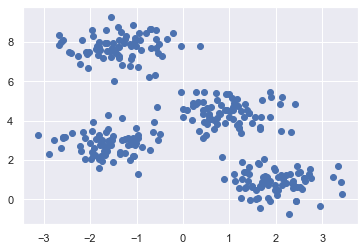

In [2]:
# gerando e plotando dados

X, y = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.60, random_state = 0)
plt.scatter(X[:,0], X[:,1])

In [3]:
# calculando a distância de cada ponto para seu ponto mais próximo (isso é feito para todos os pontos do dataset)

neigh = NearestNeighbors(n_neighbors = 2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

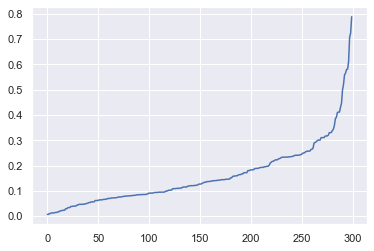

In [4]:
# embaralhando e plotando as distâncias (o ponto de curvatura será o epsilon ótimo)

distances = np.sort(distances, axis = 0)
distances = distances[:,1]
plt.plot(distances)

In [5]:
# inicializando e rodando o algoritmo

m = DBSCAN(eps = 0.3, min_samples = 5)
m.fit(X)

DBSCAN(eps=0.3)

In [6]:
# lista de pontos e clusters
clusters = m.labels_

In [7]:
# associando uma cor a cada cluster

colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

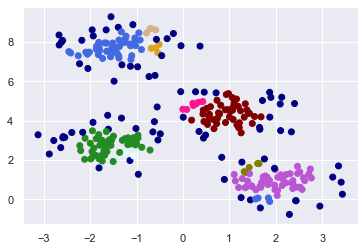

In [8]:
# plot dos pontos com seus clusters
plt.scatter(X[:,0], X[:,1], c=vectorizer(clusters))